In [27]:
#Import Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset["train"].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

In [28]:
df = df[df['job_title_short'] == 'Data Analyst']

In [29]:
df_exploded = df.explode('job_skills')
skills_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median')
)

In [30]:
skills_stats_1 = skills_stats.sort_values(by='skill_count',ascending = False).head(10)

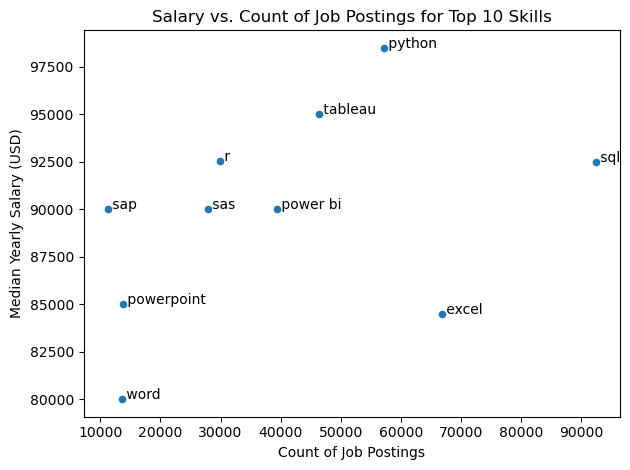

In [31]:
skills_stats_1.plot(kind='scatter', x = 'skill_count', y = 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skills_stats_1.index):
    plt.text(skills_stats_1['skill_count'].iloc[i],skills_stats_1['median_salary'].iloc[i],f' {txt}')

plt.show()

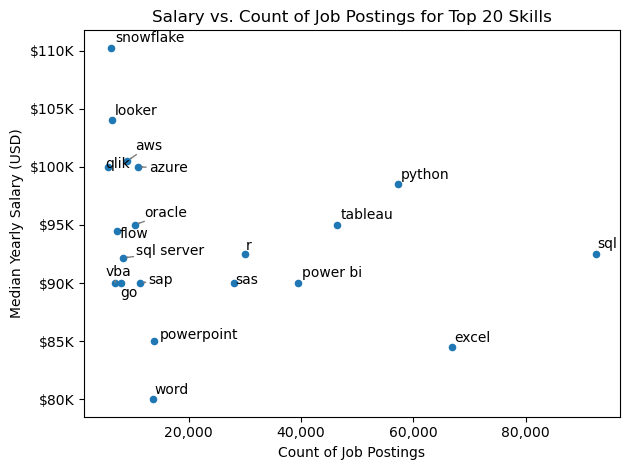

In [44]:
#Further customization
# Limit the top skills
from adjustText import adjust_text
import matplotlib.ticker as mticker

skill_count = 20
skills_stats_2 = skills_stats.sort_values(by='skill_count',ascending=False).head(skill_count)

skills_stats_2.plot(kind='scatter', x = 'skill_count', y = 'median_salary')

texts = []
for i, txt in enumerate(skills_stats_2.index):
    texts.append(plt.text(skills_stats_2['skill_count'].iloc[i],skills_stats_2['median_salary'].iloc[i],txt))

adjust_text(texts, arrowprops = dict(arrowstyle = "->",color = 'gray', lw=1))

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))   # FuncFormatter

# Formatting x-axis with commas
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))   # FuncFormatter


plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title(f'Salary vs. Count of Job Postings for Top {skill_count} Skills')
plt.tight_layout()
plt.show()